# Visualization: Perbandingan Kuantitatif 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [2]:
## structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
Date                          1319 non-null object
TempHighF                     1319 non-null int64
TempAvgF                      1319 non-null int64
TempLowF                      1319 non-null int64
DewPointHighF                 1319 non-null object
DewPointAvgF                  1319 non-null object
DewPointLowF                  1319 non-null object
HumidityHighPercent           1319 non-null object
HumidityAvgPercent            1319 non-null object
HumidityLowPercent            1319 non-null object
SeaLevelPressureHighInches    1319 non-null object
SeaLevelPressureAvgInches     1319 non-null object
SeaLevelPressureLowInches     1319 non-null object
VisibilityHighMiles           1319 non-null object
VisibilityAvgMiles            1319 non-null object
VisibilityLowMiles            1319 non-null object
WindHighMPH                   1319 non-null object
WindAvgMPH                   

<h2>Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Step2 : 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka :

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah :

ket : 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

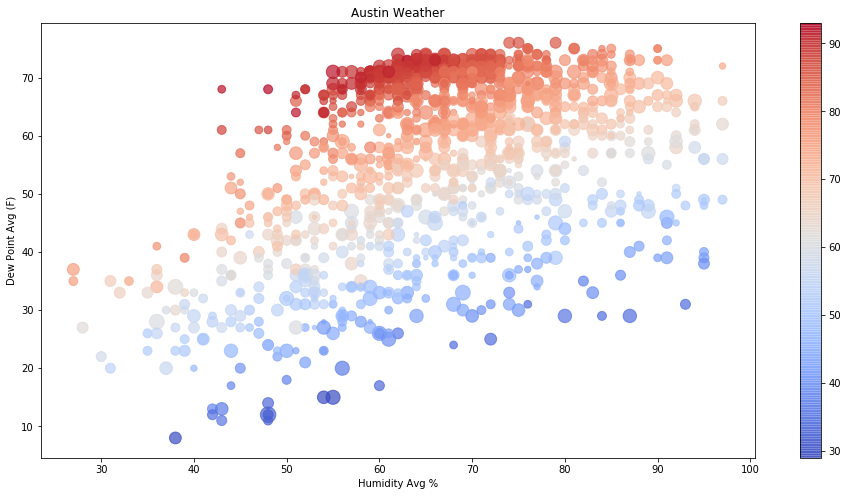

In [3]:
## replace '-' into NaN
df = df.replace('-', np.NaN, regex=True)


In [4]:
## replace NaN into specific value with method=ffill
df = df.fillna(method='ffill')


In [5]:
## mengubah data type menjadi float
df['DewPointAvgF'] = pd.to_numeric(df['DewPointAvgF'], downcast='float')
df['HumidityAvgPercent'] = pd.to_numeric(df['HumidityAvgPercent'], downcast='float')
df['TempAvgF'] = pd.to_numeric(df['TempAvgF'], downcast='float')
df['WindAvgMPH'] = pd.to_numeric(df['WindAvgMPH'], downcast='float')


Text(0.5, 1.0, 'Austin Weather')

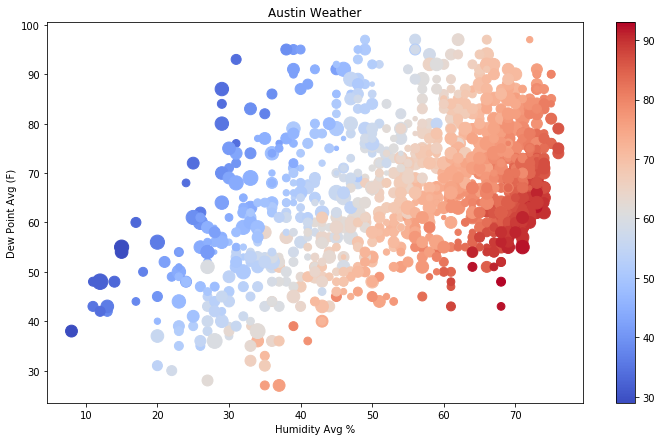

In [6]:
## membuat objek figure
fig, ax = plt.subplots(figsize=(12,7))

## membuat scatter plot
austin = ax.scatter(x=df['DewPointAvgF'], y=df['HumidityAvgPercent'], c=df['TempAvgF'], s=df['WindAvgMPH']*20, cmap='coolwarm')
fig.colorbar(austin)

## memberi label sumbu dan judul grafik
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Weather')


Sumber belajar:

- data can be downloaded from https://www.kaggle.com/grubenm/austin-weather
- https://www.youtube.com/watch?v=zduwtYbQnkE&feature=youtu.be
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- https://kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-of-strings-to-floats-in-python